In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [117]:
df = pd.read_csv('Admission_Predict.csv')


In [118]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [119]:
#Shape
shape = df.shape
print("Number of Samples:", shape[0])
print("Number of Features:", shape[1])

Number of Samples: 400
Number of Features: 9


Drop " Serial No." no needed for classification

In [121]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [122]:
df = df.drop('Serial No.',axis=1)

In [123]:

# Step 1: Use the 75th percentile to convert 'Chance of Admit ' to binary (0 or 1)
threshold = df['Chance of Admit '].describe()['75%']
df['Admitted'] = (df['Chance of Admit '] >= threshold).astype(int)

# Drop the original 'Chance of Admit ' column as it's now converted
df = df.drop(['Chance of Admit '], axis=1)

# Check for class imbalance
admitted_counts = df['Admitted'].value_counts()

# Display the threshold used and the class distribution
threshold, admitted_counts


(0.83,
 Admitted
 0    299
 1    101
 Name: count, dtype: int64)

In [124]:
# Check the current class distribution

# Separate the majority and minority classes based on the current distribution
df_majority = df[df['Admitted'] == 0]  # Not Admitted
df_minority = df[df['Admitted'] == 1]  # Admitted

# Upsample the minority class (Admitted) to match the size of the majority class (Not Admitted)
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority),  # to match the majority class
                                 random_state=42)   # reproducible results

# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check the new class distribution
balanced_counts = df_balanced['Admitted'].value_counts()
balanced_counts


Admitted
0    299
1    299
Name: count, dtype: int64

In [125]:
x = df[['GRE Score','University Rating','CGPA']]

y = df['Admitted']

# Drop columns from the balanced dataset except the specified features in x and the target y
df_balanced = df_balanced[['GRE Score', 'University Rating', 'CGPA', 'Admitted']]

# Display the first few rows of the modified balanced DataFrame
df_balanced.head()


,GRE Score,University Rating,CGPA,Admitted
1,324,4,8.87,0
2,316,3,8.00,0
3,322,3,8.67,0
4,314,2,8.21,0
6,321,3,8.20,0


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=14)

print(f"Size of splitted data")
print(f"x_train {x_train.shape}") 
print(f"y_train {y_train.shape}") 
print(f"y_train {x_test.shape}") 
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (300, 3)
y_train (300,)
y_train (100, 3)
y_test (100,)


Criterion: gini
Training Accuracy: 0.9600
Testing Accuracy: 0.9200
Confusion Matrix (Train):
 [[219   5]
 [  6  70]]
Confusion Matrix (Test):
 [[71  4]
 [ 4 21]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       224
           1       0.93      0.92      0.93        76

    accuracy                           0.96       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.84      0.84      0.84        25

    accuracy                           0.92       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.92      0.92      0.92       100



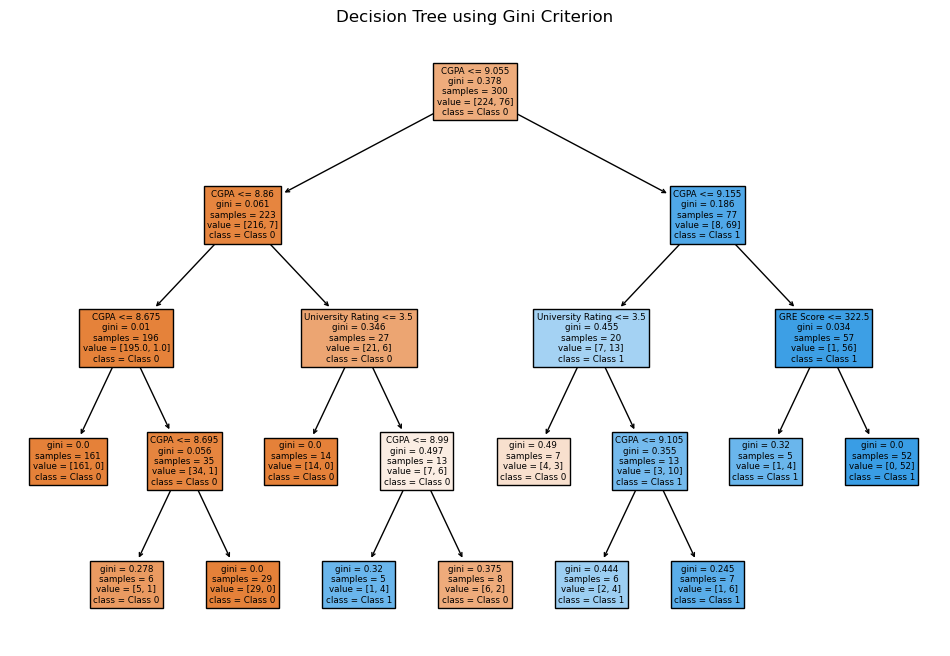

Criterion: entropy
Training Accuracy: 0.9700
Testing Accuracy: 0.9100
Confusion Matrix (Train):
 [[222   2]
 [  7  69]]
Confusion Matrix (Test):
 [[71  4]
 [ 5 20]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       224
           1       0.97      0.91      0.94        76

    accuracy                           0.97       300
   macro avg       0.97      0.95      0.96       300
weighted avg       0.97      0.97      0.97       300


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        75
           1       0.83      0.80      0.82        25

    accuracy                           0.91       100
   macro avg       0.88      0.87      0.88       100
weighted avg       0.91      0.91      0.91       100



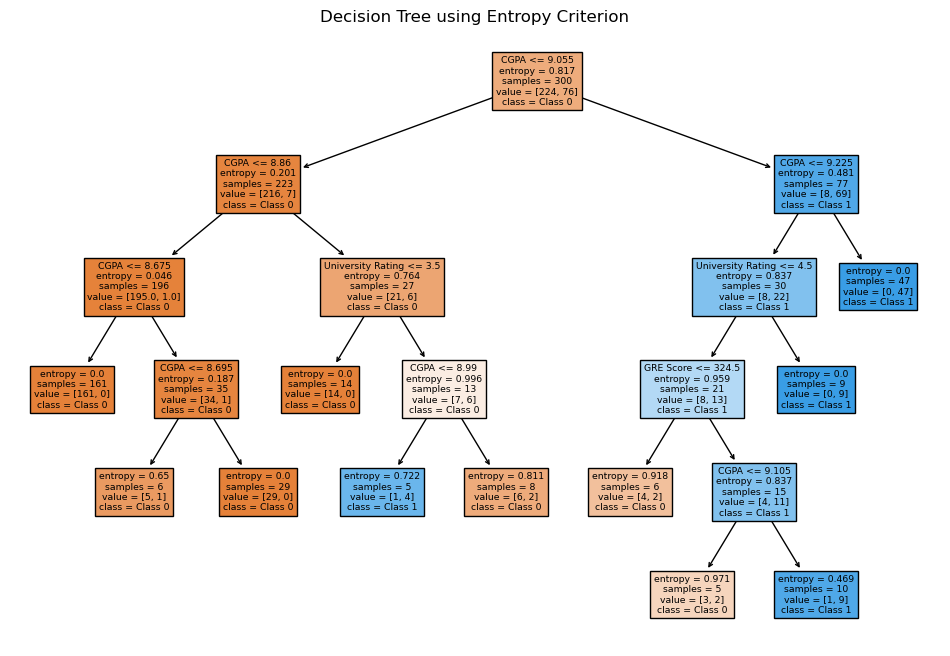

In [127]:


# Function to train and evaluate with additional parameters to control tree size
def train_and_evaluate_pruned(criterion, x_train, y_train, x_test, y_test):
    # Adjusting parameters to prune the tree
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=5,               # Set a maximum depth to control tree size
        min_samples_split=10,      # Minimum samples needed to split a node
        min_samples_leaf=5,        # Minimum samples needed at a leaf node
        random_state=14
    )
    model.fit(x_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred)

    # Evaluation metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    return {
        "criterion": criterion,
        "model": model,
        "train_accuracy": np.round(train_accuracy,2),
        "train_conf_matrix": train_conf_matrix,
        "train_report": train_report,
        "test_accuracy": test_accuracy,
        "test_conf_matrix": test_conf_matrix,
        "test_report": test_report,
    }

# Function to display results
def display_results(results, x_train):
    print(f"Criterion: {results['criterion']}")
    print(f"Training Accuracy: {results['train_accuracy']:.4f}")
    print(f"Testing Accuracy: {results['test_accuracy']:.4f}")
    print("Confusion Matrix (Train):\n", results['train_conf_matrix'])
    print("Confusion Matrix (Test):\n", results['test_conf_matrix'])
    print("\nClassification Report (Train):\n", results['train_report'])
    print("\nClassification Report (Test):\n", results['test_report'])

    # Visualize the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(results['model'], filled=True, feature_names=x_train.columns, class_names=['Class 0', 'Class 1'])
    plt.title(f"Decision Tree using {results['criterion'].capitalize()} Criterion")
    plt.show()

# Train and evaluate the pruned Decision Tree using Gini index
pruned_gini_results = train_and_evaluate_pruned('gini', x_train, y_train, x_test, y_test)

# Train and evaluate the pruned Decision Tree using Entropy
pruned_entropy_results = train_and_evaluate_pruned('entropy', x_train, y_train, x_test, y_test)

# Display results for the pruned Gini index tree
display_results(pruned_gini_results, x_train)

# Display results for the pruned Entropy tree
display_results(pruned_entropy_results, x_train)
